# Web Scraping, Data Wrangling, and Flask Dashboard (Case Study: IMDB)


Greetings all! My name is Gissella Nadya and this is my submission / capstone project for Data Analysis Specialization, specifically in Web Scraping using BeautifulSoup, Data Wrangling, and Implementing to Flask Dashboard. I choose IMDB as my case study because I am passionate about movies and tv shows. So let's start coding!

Please make sure you have this library installed in your environment, as we are going to use it:

- BeautifulSoup4
- Flask
- Pandas
- Matplotlib



## Step 1: Requesting the Data and Creating the BeautifulSoup



Let's begin the first step with importing all libraries needed for this project, then requesting the web from the site using the  `requests.get` method.

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from flask import Flask, render_template
from io import BytesIO
import base64

In [2]:
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

We can use the `___.content[x1:x10]` to see exactly what we get from x1 to x10. x1 and x10 can be input with other numbers. In this case I input 1 and 509 meaning that I get to see the letter from 1 until 509 from the html. This method is also called as slicing, and only used for visualization. 

In [3]:
url_get.content[1:509]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1})'

Because we as humans cannot see and understand clearly from the visualization above, we use the help of `BeautifulSoup` to transform a complex HTML document into a complex tree of Python objects.

Then, we can use `soup.prettify` to see the data nice and clearly :D

In [4]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:509])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (fu


## Step 2: Finding the right key to scrap the data 

We use the code `soup.find()` to determine clearly from which specific things we are exploring. 

In this case i use `soup.find()` and put it as `table`.

In [6]:
# pertama kita buat table nya dulu
table = soup.find('div', attrs={'class':'lister list detail sub-list'}) 

print(table.prettify()[1:598])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt8111088/">
     <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/i


We are now all set. To be clearer, before we put the code in `temp`, I want to elaborate so You and My-Future-Self can know what is going on with the code :)

## Step 3: Extracting the right information

### How to get the Film's Data (Row)

In [7]:
# syntax ini untuk nyari 'baris' nya atau data per row nya 
# maksudnya adalah film film nya yang di imdb 

row = table.find_all('div',attrs={'class':'lister-item mode-advanced'})

row[0]

# 0 ini maksudnya data pertama, jadi si The Mandalorian(1), kalau 6 berarti Wayne(7)

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt8111088/"> <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt8111088/">The Mandalorian</a>
<span class="lister-item-year text-muted unbold">(2019– )</span>
</h3>
<p class="text-muted">
<span class="runtime">40 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
<

We may skip this part and go directly to Step 4: Scrapping Process!

**RUN ALL FROM ABOVE HERE**

### How to get the Title (Run all above Here)

In [ ]:
# nah ini untuk nyari judul nya, karena jawabannya masih banyak, 
# maka cari yang spesifik yaitu yang awalannya adalah 'a' 
# lalu di buat text nya juga biar hilangin tulisan 'href="/title/tt8111088/">'


judul = row[0].find('h3', attrs={'class':'lister-item-header'})
judul

In [ ]:
# ini jawabannya
# see, kalau diganti row[0] 0 nya jadi 6 pasti jawabannya Wayne(7), coba!

judul = row[0].find('h3', attrs={'class':'lister-item-header'}).find('a').text
judul

### How to get the IMDB Rating

In [ ]:
# seperti tadi lagi, kita cari yang barisnya bener bener angka lalu di find dan text
rating = row[0].find('div', attrs={'class':'inline-block ratings-imdb-rating'})
rating

In [ ]:
rating = row[0].find('div', attrs={'class':'inline-block ratings-imdb-rating'}).find('strong').text
rating

### How to get the MetaScore 

In [ ]:
# di contoh, yang ada metascores hanya Dreamland(4), dan Jojo Rabbit(5)
# jadi baiknya kita buat visualisasi mata kita lihat yang jawabannya pasti ada
# seperti title, kita find si angka nya letaknya dimana trus jadiin text

metascores = row[3].find('div', attrs={'class':'inline-block ratings-metascore'})
metascores

In [ ]:
# nah karena jawabannya ada titiknya banyak, maka kita pakai strip agar titik" hilang.
metascores = row[3].find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text
metascores

In [ ]:
metascores = row[3].find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip()
metascores

Question is, not all movies and films are getting metascores, how will we resolve this situation ? We will make an If/Then situation which will be included in the `temp` code :)

### How to know the Votes count

In [ ]:
# oke kita sudah cari votes nya sekarang cari letak asli nomor votes
votes = row[0].find('p', attrs={'class':'sort-num_votes-visible'})
votes

In [ ]:
# loh kok yang di ambil tulisan votes nya, bukan angkanya? 
# karena dia ambil yang paling PERTAMA
# jadi kita harus lebih spesifik lagi,
# refer ke website nya melalui inspect, kita bisa lihat kalau tulisannya 
# span class>>>> lalu ada >>>> span name="nv"
# letak angka votes disitu jadi kita harus find span name nv

votes = row[0].find('p', attrs={'class':'sort-num_votes-visible'}).find('span').text
votes

In [ ]:
votes = row[0].find('p', attrs={'class':'sort-num_votes-visible'}).find('span', attrs={'name':'nv'}).text
votes

## Step 4: Let's start the Scrapping Process!

After seeing all the thorough explanation on how the extracting actually works, we now can put all the codes inside the `temp` code. 

the "for `i` in range `(0,len(row))`: meaning that the i is the looping and 0 is the start and len(row) is the end, in this case we decided to take the whole ranking in one page (there are 50 films and movies).

We included the row, title, rating, votes code here. 

And on the end of the tuple we put in `temp.append((___,___,___,___))` to put in the code into the output that we are about to see.

In [8]:
temp = [] #initiating a tuple

for i in range(0, len(row)):
    
    row = table.find_all('div',attrs={'class':'lister-item mode-advanced'})[i]

    
    judul = row.find('h3', attrs={'class':'lister-item-header'}).find('a').text
    
    if row.find('div', attrs={'class':'inline-block ratings-metascore'}) is None:
        metascores = '0'
    elif row.find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text:
        metascores = row.find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip()
    
    rating = row.find('div', attrs={'class':'inline-block ratings-imdb-rating'}).find('strong').text
    
    votes = row.find('p', attrs={'class':'sort-num_votes-visible'}).find('span', attrs={'name':'nv'}).text
    
    temp.append((judul, rating, metascores, votes))
    
temp 

[('The Mandalorian', '8.7', '0', '220,322'),
 ('His Dark Materials', '7.9', '0', '42,284'),
 ('The Boys', '8.7', '0', '218,183'),
 ('Dreamland', '5.7', '57', '1,245'),
 ('Jojo Rabbit', '7.9', '58', '278,500'),
 ('Servant', '7.6', '0', '15,908'),
 ('Wayne', '8.4', '0', '8,567'),
 ('The Gentlemen', '7.8', '51', '208,050'),
 ('Undercover', '7.9', '0', '9,484'),
 ('The Witcher', '8.2', '0', '282,826'),
 ('Knives Out', '7.9', '82', '420,096'),
 ('Gisaengchung', '8.6', '96', '512,951'),
 ('Once Upon a Time... in Hollywood', '7.6', '83', '531,204'),
 ('Joker', '8.5', '59', '901,088'),
 ('Avengers: Endgame', '8.4', '78', '782,959'),
 ('Sex Education', '8.3', '0', '149,181'),
 ('Euphoria', '8.4', '0', '53,697'),
 ('Warrior', '8.2', '0', '13,240'),
 ('1917', '8.3', '78', '393,895'),
 ('Midsommar', '7.1', '72', '191,158'),
 ('Chernobyl', '9.4', '0', '513,961'),
 ('Doctor Sleep', '7.3', '59', '136,023'),
 ('Star Wars: Episode IX - The Rise of Skywalker', '6.6', '53', '359,422'),
 ('The Unicorn', '

## Step 5: Creating data frame & Data wrangling

Because we have installed pandas in this notebook, we can then simply put `pd.dataframe()` to make a dataframe from the temp that we've made just now.

In [26]:
imdb = pd.DataFrame(temp, columns= ('Title', 'Ratings', 'Metascores', 'Votes'))
imdb

,Title,Ratings,Metascores,Votes
0,The Mandalorian,8.7,0,"220,322"
1,His Dark Materials,7.9,0,"42,284"
2,The Boys,8.7,0,"218,183"
3,Dreamland,5.7,57,"1,245"
4,Jojo Rabbit,7.9,58,"278,500"
5,Servant,7.6,0,"15,908"
6,Wayne,8.4,0,"8,567"
7,The Gentlemen,7.8,51,"208,050"
8,Undercover,7.9,0,"9,484"
9,The Witcher,8.2,0,"282,826"


Awesome! Now we get the dataframe, let's find out their info :)

In [27]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       50 non-null     object
 1   Ratings     50 non-null     object
 2   Metascores  50 non-null     object
 3   Votes       50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


It looks like that all of the data types are considered as object. This is not right, let's change this!

### How to change the columns type

In [28]:
# ganti ratings dan metascores jadi float agar bisa di buat plot

imdb[['Ratings','Metascores']] = imdb[['Ratings','Metascores']].astype('float64')

In [29]:
# untuk buat title nya yang jadi index nya

imdb = imdb.set_index('Title')

In [30]:
# kita mau buat kolom Votes jadi integer biar bisa di buat plot. 

imdb['Votes'] = imdb['Votes'].str.replace(',', '')
imdb['Votes'] = imdb['Votes'].astype('int')

In [31]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, The Mandalorian to Epidemiya
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ratings     50 non-null     float64
 1   Metascores  50 non-null     float64
 2   Votes       50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


notice how before we got 4 columns, and now only 3 ? It's because that we have made the `Title` columns to become the index of the dataframe :) Don't believe it? See it for yourself

In [32]:
imdb

,Ratings,Metascores,Votes
Title,,,
The Mandalorian,8.7,0.0,220322
His Dark Materials,7.9,0.0,42284
The Boys,8.7,0.0,218183
Dreamland,5.7,57.0,1245
Jojo Rabbit,7.9,58.0,278500
Servant,7.6,0.0,15908
Wayne,8.4,0.0,8567
The Gentlemen,7.8,51.0,208050
Undercover,7.9,0.0,9484


Then we make a dataframe that only concludes the top 7 because that is what we are going to take a look at :D

In [33]:
imdb7 = imdb.head(7).copy()
imdb7

,Ratings,Metascores,Votes
Title,,,
The Mandalorian,8.7,0.0,220322
His Dark Materials,7.9,0.0,42284
The Boys,8.7,0.0,218183
Dreamland,5.7,57.0,1245
Jojo Rabbit,7.9,58.0,278500
Servant,7.6,0.0,15908
Wayne,8.4,0.0,8567


Alright! So we know for sure that number `#1` is `The Mandalorian` and number `#7` is `Wayne`.
We are most likely to use the plot bar here, thus to make sure the `The Mandalorian` is still at the top, we use this code below :)

In [34]:
# agar saat di tampilin di plot barh, yang ranking 1 posisinya di paling atas.

imdb7 = imdb7[::-1]
imdb7

,Ratings,Metascores,Votes
Title,,,
Wayne,8.4,0.0,8567
Servant,7.6,0.0,15908
Jojo Rabbit,7.9,58.0,278500
Dreamland,5.7,57.0,1245
The Boys,8.7,0.0,218183
His Dark Materials,7.9,0.0,42284
The Mandalorian,8.7,0.0,220322


In [35]:
imdb7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Wayne to The Mandalorian
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ratings     7 non-null      float64
 1   Metascores  7 non-null      float64
 2   Votes       7 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 224.0+ bytes


### How to make the Plot 

now thanks to `matplotlib` we can make beautiful plot from the dataframe that we have prepared for. We can also change the figure seting, the layout, etcetera. At this case, I wanted to change the style to be `seaborn-dark-palette` and I am going to use the syntax `plt.style.use('__')` to make sure matplotlib understand what I want.

In [36]:
plt.style.use('seaborn-dark-palette')

#### Making Ratings plot

Text(0.5, 1.0, 'IMDB Top 7 Films/TV Shows in 2019, Ratings Received')

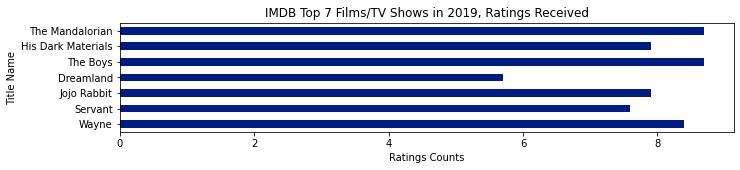

In [37]:
top7_r = imdb7['Ratings'].plot.barh(figsize = (11,2))
top7_r.set_xlabel('Ratings Counts')
top7_r.set_ylabel('Title Name')
top7_r.set_title('IMDB Top 7 Films/TV Shows in 2019, Ratings Received')

#### Making comparison Ratings and Metascores plot

Text(0.5, 1.0, 'IMDB Top 7 Films/TV Shows in 2019, Ratings and Metascores Received')

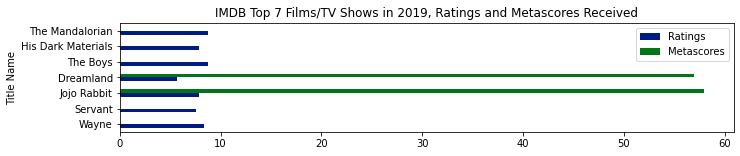

In [38]:
top7_rm = imdb7[['Ratings','Metascores']].plot.barh(figsize = (11,2))
top7_rm.set_ylabel('Title Name')
top7_rm.set_title('IMDB Top 7 Films/TV Shows in 2019, Ratings and Metascores Received')

#### Making the Votes plot

Text(0.5, 1.0, 'IMDB Top 7 Films/TV Shows in 2019, Votes Received')

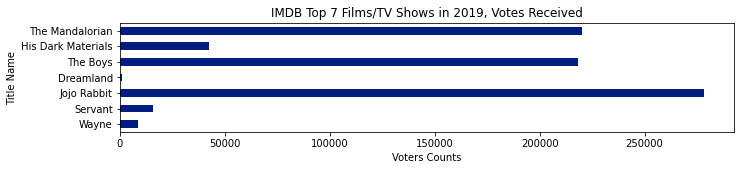

In [39]:
top7_v = imdb7['Votes'].plot.barh(figsize = (11,2))
top7_v.set_xlabel('Voters Counts')
top7_v.set_ylabel('Title Name')
top7_v.set_title('IMDB Top 7 Films/TV Shows in 2019, Votes Received')

## Step 6: Implementing your webscrapping to the Flask dashboard


Wow, we are at the stage where we have to implementing our hardwork to the flaskboard. And how is that? Luckily we are shown and taught how to go from here. So here is what we are going to do:


- Copy paste all of our web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

In [49]:
def scrap(url):
    #insert the scrapping here
    url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
    soup = BeautifulSoup(url_get.content,"html.parser")


    table = soup.find('div', attrs={'class':'lister list detail sub-list'}) 
    row = table.find_all('div',attrs={'class':'lister-item mode-advanced'})


    temp = [] #initiating a tuple

    for i in range(0, len(row)):
    
        row = table.find_all('div',attrs={'class':'lister-item mode-advanced'})[i]

    
        judul = row.find('h3', attrs={'class':'lister-item-header'}).find('a').text
    
        if row.find('div', attrs={'class':'inline-block ratings-metascore'}) is None:
            metascores = '0'
        elif row.find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text:
            metascores = row.find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip()
    
        rating = row.find('div', attrs={'class':'inline-block ratings-imdb-rating'}).find('strong').text
    
        votes = row.find('p', attrs={'class':'sort-num_votes-visible'}).find('span', attrs={'name':'nv'}).text
    
        temp.append((judul, rating, metascores, votes))
    
    temp 


    #change into dataframe
    imdb = pd.DataFrame(temp, columns= ('Title', 'Ratings', 'Metascores', 'Votes'))

    #insert data wrangling here
    imdb = imdb.set_index('Title')
    imdb[['Ratings','Metascores']] = imdb[['Ratings','Metascores']].astype('float64')
    imdb['Votes'] = imdb['Votes'].str.replace(',', '')
    imdb['Votes'] = imdb['Votes'].astype('int')

    imdb7 = imdb.head(7).copy()
    imdb7 = imdb7[::-1]

    plt.style.use('seaborn-dark-palette')

    #end of data wranggling 
    return imdb

In [51]:
imdb = scrap('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
imdb

,Ratings,Metascores,Votes
Title,,,
The Mandalorian,8.7,0.0,220322
His Dark Materials,7.9,0.0,42284
The Boys,8.7,0.0,218183
Dreamland,5.7,57.0,1245
Jojo Rabbit,7.9,58.0,278500
Servant,7.6,0.0,15908
Wayne,8.4,0.0,8567
The Gentlemen,7.8,51.0,208050
Undercover,7.9,0.0,9484


# Finishing This Notebook with Your Analysis and Conclusion



## Popularity - Ratings

Text(0.5, 1.0, 'IMDB Top 7 Films/TV Shows in 2019, Ratings Received')

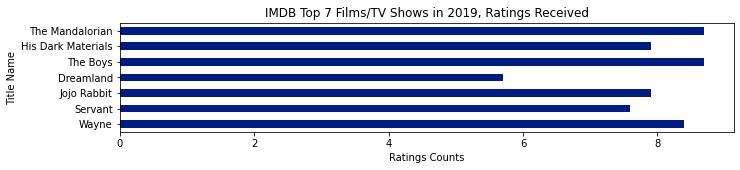

In [53]:
top7_r = imdb7['Ratings'].plot.barh(figsize = (11,2))
top7_r.set_xlabel('Ratings Counts')
top7_r.set_ylabel('Title Name')
top7_r.set_title('IMDB Top 7 Films/TV Shows in 2019, Ratings Received')

As we know, the Top 7 Film/TV Shows released in 2019 according to IMDB, sorted by popularity, has "The Mandalorian" as the most popular Film/TV Shows, and "Wayne" as the least popular out of the seven. 


The bar graph above shows the the rating counts (out of 10), according to IMDB's rating. 
From the plot bar above, we can see that both "The Mandalorian" and "The Boys" received the highest ratings, followed by "Wayne", then both "His Dark Materials" and "Jojo Rabbit", then "Servant" and the lowest rating which is "Dreamland". 


As we compare these facts to the popularity scale, it can be seen that actually the popularity of a film does not determined whether the ratings received are the highest of them all. In this case both "The Mandalorian", which is ranking number 1, and "The Boys" that is ranking number 3 received the highest ratings. "The Boys" beat "His Dark Materials" which is shown as number two in the ranking. 


Knowing these facts, we wanted to know whether they all are received High metascores. Want to know more? click the "Ratings and Metascores" tab!

## Popularity - Ratings and Metascores

Text(0.5, 1.0, 'IMDB Top 7 Films/TV Shows in 2019, Ratings and Metascores Received')

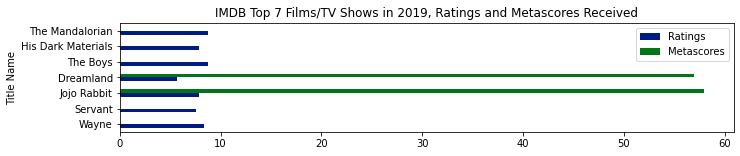

In [55]:
top7_rm = imdb7[['Ratings','Metascores']].plot.barh(figsize = (11,2))
top7_rm.set_ylabel('Title Name')
top7_rm.set_title('IMDB Top 7 Films/TV Shows in 2019, Ratings and Metascores Received')

Here we want to compare these Films/TV Shows on how they score for the Metascores. A brief summary, Metascore is a scoring system provided by Metacritics, a website that aggregates that reviews Films, TV Shows, Books, etc. Generally, if a Film/TV Shows/Music receive a 61-80, this means that the object received generally favorable reviews and if they got 81-100 that means it is "universal acclaim" that it is a good Film/TV Shows/Music. 

Here in the plot you can see that only 2 Films receive metascores, and they are both in the range 55-60. Remember "The Mandalorian" and "The Boys, which received the highest ratings out of the other seven, they haven't received any metascores yet! Surprise Surprise!

## Popularity - Voters

Text(0.5, 1.0, 'IMDB Top 7 Films/TV Shows in 2019, Votes Received')

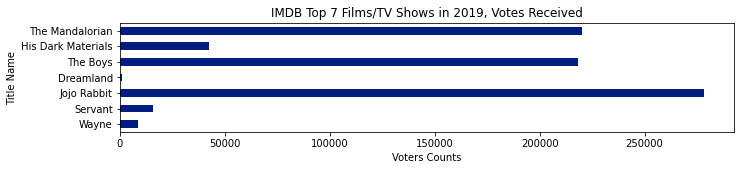

In [54]:
top7_v = imdb7['Votes'].plot.barh(figsize = (11,2))
top7_v.set_xlabel('Voters Counts')
top7_v.set_ylabel('Title Name')
top7_v.set_title('IMDB Top 7 Films/TV Shows in 2019, Votes Received')

On the plot above we can see how many people voted for the Films/TV Shows. It can be seen that "Jojo Rabbit" received the highest voters of them all and "Dreamland" received the least! 